## Exploratity

In [1]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x)

  import pandas as pd


In [2]:
df=pd.read_csv("D:/my/Само/online/online_retail_listing.csv",  delimiter=';', encoding="latin-1")
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,1.12.2009 07:45,"6,95",13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,1.12.2009 07:45,"6,75",13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,1.12.2009 07:45,"6,75",13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,1.12.2009 07:45,"2,1",13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.12.2009 07:45,"1,25",13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
1048570,580501,23284,DOORMAT KEEP CALM AND COME IN,2,4.12.2011 13:00,"8,25",14546.00,United Kingdom
1048571,580501,22507,MEMO BOARD RETROSPOT DESIGN,3,4.12.2011 13:00,"4,95",14546.00,United Kingdom
1048572,580502,22469,HEART OF WICKER SMALL,3,4.12.2011 13:15,"1,65",16931.00,United Kingdom
1048573,580502,23489,VINTAGE BELLS GARLAND,2,4.12.2011 13:15,"2,89",16931.00,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1048575 non-null  object 
 1   StockCode    1048575 non-null  object 
 2   Description  1044203 non-null  object 
 3   Quantity     1048575 non-null  int64  
 4   InvoiceDate  1048575 non-null  object 
 5   Price        1048575 non-null  object 
 6   Customer ID  811893 non-null   float64
 7   Country      1048575 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 64.0+ MB


In [6]:
df['Description'].nunique()

5697

In [7]:
df['Description'].value_counts().head()

Description
WHITE HANGING HEART T-LIGHT HOLDER    5875
REGENCY CAKESTAND 3 TIER              4364
JUMBO BAG RED RETROSPOT               3426
ASSORTED COLOUR BIRD ORNAMENT         2928
PARTY BUNTING                         2746
Name: count, dtype: int64

In [8]:
df.groupby('Description').agg({'Quantity':'sum'}).head()

,Quantity
Description,
DOORMAT UNION JACK GUNS AND ROSES,179
3 STRIPEY MICE FELTCRAFT,690
4 PURPLE FLOCK DINNER CANDLES,302
50'S CHRISTMAS GIFT BAG LARGE,1875
ANIMAL STICKERS,385


In [9]:
df['Invoice'].nunique()

52961

In [10]:
df['Price']=df['Price'].apply(lambda x:float(str(x.replace(',', "."))))
df['TotalPrice']=df['Quantity']*df['Price']
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,1.12.2009 07:45,6.95,13085.00,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,1.12.2009 07:45,6.75,13085.00,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,1.12.2009 07:45,6.75,13085.00,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,1.12.2009 07:45,2.10,13085.00,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.12.2009 07:45,1.25,13085.00,United Kingdom,30.00


In [11]:
df.groupby('Invoice').agg({'TotalPrice':'sum'}).head()

,TotalPrice
Invoice,
489434,505.30
489435,145.80
489436,630.33
489437,310.75
489438,2286.24


In [12]:
df.groupby('Description').agg({'Price':"max"}).sort_values('Price', ascending=False).head()

,Price
Description,
Manual,38970.00
Bank Charges,18910.69
AMAZON FEE,16888.02
Adjust bad debt,11062.06
POSTAGE,8142.75


In [13]:
df['Country'].value_counts().head()

Country
United Kingdom    963819
EIRE               17581
Germany            17327
France             14100
Netherlands         5054
Name: count, dtype: int64

In [14]:
returned=df[df['Invoice'].str.contains('C', na=False)]
returned.sort_values('Quantity', ascending=True).head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
587085,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,18.01.2011 10:17,1.04,12346.00,United Kingdom,-77183.60
529729,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2.12.2010 14:23,0.03,15838.00,United Kingdom,-280.80
507225,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2.12.2010 14:23,0.03,15838.00,United Kingdom,-280.80
359669,C524235,21088,SET/6 FRUIT SALAD PAPER CUPS,-7128,28.09.2010 11:02,0.08,14277.00,France,-570.24
359670,C524235,21096,SET/6 FRUIT SALAD PAPER PLATES,-7008,28.09.2010 11:02,0.13,14277.00,France,-911.04


## Missing

In [15]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      4372
Quantity            0
InvoiceDate         0
Price               0
Customer ID    236682
Country             0
TotalPrice          0
dtype: int64

In [16]:
df.dropna(inplace=True)
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
TotalPrice     0
dtype: int64

## Qutlier

In [17]:
for feature in ['Quantity', 'Price', 'TotalPrice']:
    Q1=df[feature].quantile(0.01)
    Q3=df[feature].quantile(0.99)
    IQR=Q3-Q1
    upper=Q3+1.5*IQR
    lower=Q1-1.5*IQR

    if df[(df[feature] > upper) | (df[feature] < lower)].any(axis=None):
        print(feature, 'Y')
        print(df[(df[feature] > upper) | (df[feature] < lower)].shape[0])
    else:
        print(feature, 'no')

Quantity Y
2142
Price Y
1789
TotalPrice Y
2113


## Recency - R

In [18]:
import datetime as dt

In [19]:
df=df[~df['Invoice'].str.contains('C', na=False)]
df['Customer ID']=df['Customer ID'].astype(int)

In [20]:
print('Min Data', df['InvoiceDate'].min(), 'Max Date', df['InvoiceDate'].max())

Min Data 1.02.2010 08:13 Max Date 9.12.2010 20:01


In [21]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], format='mixed')
recency = (dt.datetime(2012, 1, 1) - df.groupby("Customer ID").agg({"InvoiceDate":"max"})).rename(columns = {"InvoiceDate":"Recency"})
recency["Recency"] = recency["Recency"].apply(lambda x: x.days)
recency.head()

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], format='mixed')


,Recency
Customer ID,
12346,347
12347,61
12348,97
12349,40
12350,332


## Frequency - F 

In [22]:
freq=df.groupby("Customer ID").agg({'InvoiceDate':'nunique'}).rename(columns={'InvoiceDate':'Frequency'})
freq.head()

,Frequency
Customer ID,
12346,12
12347,7
12348,5
12349,4
12350,1


## Monetary - M

In [23]:
monetary=df.groupby("Customer ID").agg({'TotalPrice':'sum'}).rename(columns={'TotalPrice':'Monetary'})
monetary.head()

,Monetary
Customer ID,
12346,77556.46
12347,5408.50
12348,2019.40
12349,4428.69
12350,334.40


## Creat RFM Score

In [24]:
rfm=pd.concat([recency, freq, monetary], axis=1)
rfm.head()

,Recency,Frequency,Monetary
Customer ID,,,
12346,347,12,77556.46
12347,61,7,5408.50
12348,97,5,2019.40
12349,40,4,4428.69
12350,332,1,334.40


In [25]:
rfm["RecencyScore"]  = pd.qcut(rfm["Recency"], 5, labels = [5, 4 , 3, 2, 1])
rfm["FrequencyScore"]= pd.qcut(rfm["Frequency"].rank(method="first"),5, labels=[1,2,3,4,5])
rfm["MonetaryScore"] = pd.qcut(rfm['Monetary'], 5, labels = [1, 2, 3, 4, 5])
rfm.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore
Customer ID,,,,,,
12346,347,12,77556.46,2,5,5
12347,61,7,5408.50,4,4,5
12348,97,5,2019.40,3,4,4
12349,40,4,4428.69,5,3,5
12350,332,1,334.40,2,1,2


In [26]:
rfm['RFM_SCORE']=(rfm['RecencyScore'].astype(str)+
                  rfm['FrequencyScore'].astype(str)+
                  rfm['MonetaryScore'].astype(str))
rfm.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE
Customer ID,,,,,,,
12346,347,12,77556.46,2,5,5,255
12347,61,7,5408.50,4,4,5,445
12348,97,5,2019.40,3,4,4,344
12349,40,4,4428.69,5,3,5,535
12350,332,1,334.40,2,1,2,212


In [27]:
seg_map={r'[1-2][1-2]':'Hibernating',r'[1-2][3-4]':'At Risk',r'[1-2]5':'Can\'t Loose',
        r'3[1-2]':'About to Sleep',r'33':'Need Attention',r'[3-4][4-5]':'Loyal Customers',
        r'41':'Promising',r'51':'New Customers',r'[4-5][2-3]':'Potential Loyalists',
        r'5[4-5]':'Champions'}

rfm['Segment']=rfm['RecencyScore'].astype(str)+rfm['FrequencyScore'].astype(str)
rfm['Segment']=rfm['Segment'].replace(seg_map, regex=True)
rfm.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment
Customer ID,,,,,,,,
12346,347,12,77556.46,2,5,5,255,Can't Loose
12347,61,7,5408.50,4,4,5,445,Loyal Customers
12348,97,5,2019.40,3,4,4,344,Loyal Customers
12349,40,4,4428.69,5,3,5,535,Potential Loyalists
12350,332,1,334.40,2,1,2,212,Hibernating


## Summary Statistics

In [28]:
rfmStats=rfm[['Segment', "Recency", 'Frequency', "Monetary"]].groupby('Segment').agg(['mean',"median",'count',"std"])
rfmStats.columns=rfmStats.columns.map('_'.join).str.strip('|')
rfmStats

,Recency_mean,Recency_median,Recency_count,Recency_std,Frequency_mean,Frequency_median,Frequency_count,Frequency_std,Monetary_mean,Monetary_median,Monetary_count,Monetary_std
Segment,,,,,,,,,,,,
About to Sleep,151.84,151.00,401,40.88,1.41,1.00,401,0.49,532.87,354.12,401,597.82
At Risk,397.52,400.00,754,110.26,3.80,3.00,754,1.48,1330.13,977.91,754,1736.70
Can't Loose,347.01,348.00,75,92.30,14.61,11.00,75,17.30,7194.45,3729.42,75,13137.98
Champions,32.47,33.00,852,7.25,18.29,11.00,852,27.20,10140.84,3777.14,852,34401.24
Hibernating,497.46,472.00,1511,163.59,1.24,1.00,1511,0.43,426.89,283.60,1511,767.72
Loyal Customers,99.80,86.00,1139,48.06,10.17,8.00,1139,8.76,4574.64,2657.76,1139,9931.60
Need Attention,151.22,146.00,268,40.65,3.09,3.00,268,0.66,1125.34,881.04,268,1352.62
New Customers,35.32,36.00,56,6.47,1.00,1.00,56,0.00,294.74,245.70,56,213.26
Potential Loyalists,52.52,47.00,687,18.90,2.59,3.00,687,0.90,1034.15,684.59,687,2423.34


## K-mean

In [29]:
rfm_kmeans=rfm.loc[:, 'Recency':'Monetary']
rfm_kmeans.head()

,Recency,Frequency,Monetary
Customer ID,,,
12346,347,12,77556.46
12347,61,7,5408.50
12348,97,5,2019.40
12349,40,4,4428.69
12350,332,1,334.40


In [30]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
sc = MinMaxScaler((0,1))
dataframe = sc.fit_transform(rfm_kmeans)
kmeans = KMeans(n_clusters = 10)
k_fit = kmeans.fit(dataframe)
k_fit.labels_

array([3, 8, 8, ..., 5, 1, 8])

Text(0.5, 1.0, 'Elbow method for Optimum numder of clusters')

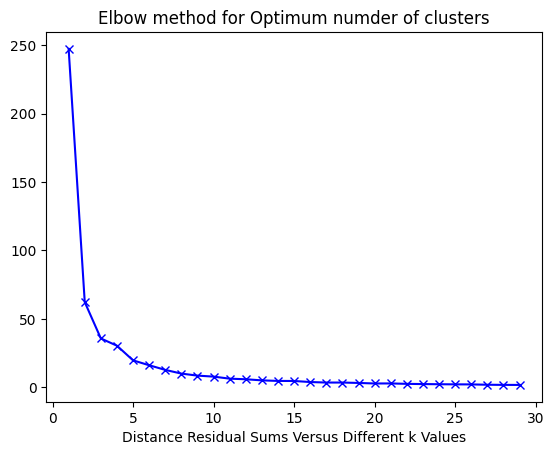

In [31]:
kmeans=KMeans(n_clusters=10)
k_fit=kmeans.fit(dataframe)
ssd=[]

K=range(1,30)

for k in K:
    kmeans=KMeans(n_clusters=k).fit(dataframe)
    ssd.append(kmeans.inertia_)

import matplotlib.pyplot as plt
plt.plot(K,ssd,'bx-')
plt.xlabel('Distance Residual Sums Versus Different k Values')
plt.title('Elbow method for Optimum numder of clusters')

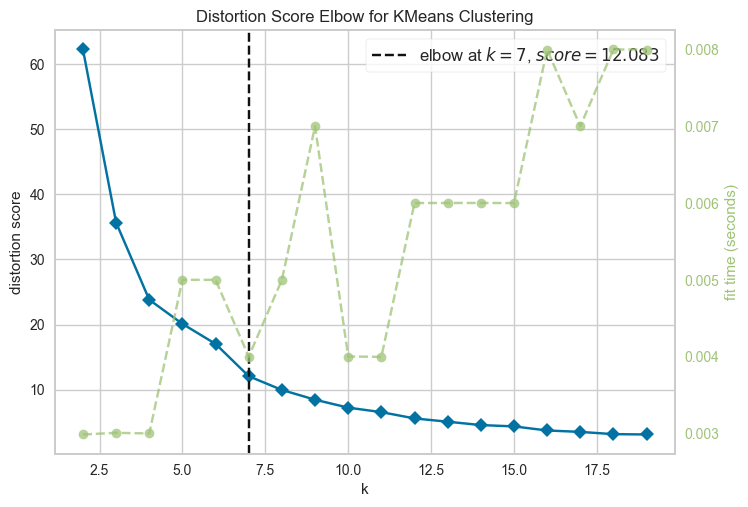

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [32]:
from yellowbrick.cluster import KElbowVisualizer
kmeans=KMeans()
visu=KElbowVisualizer(kmeans, k=(2,20))
visu.fit(dataframe)
visu.poof()

In [33]:
kmeans = KMeans(n_clusters = 6).fit(dataframe)
cluster = kmeans.labels_
pd.DataFrame({"Customer ID": rfm.index, "Cluster": cluster})
rfm_kmeans["cluster_no"] = cluster
rfm_kmeans["cluster_no"] = rfm_kmeans["cluster_no"] + 1
rfm_kmeans.head()

,Recency,Frequency,Monetary,cluster_no
Customer ID,,,,
12346,347,12,77556.46,3
12347,61,7,5408.50,4
12348,97,5,2019.40,4
12349,40,4,4428.69,4
12350,332,1,334.40,3


In [34]:
import plotly.express as px
fig=px.scatter_3d(rfm_kmeans, x=rfm_kmeans['Recency'], y=rfm_kmeans['Frequency'], 
                  z=rfm_kmeans['Monetary'], color=rfm_kmeans['cluster_no'])
fig.show()